# Summary Statistics[22][Important]
<h3 style="font-family:Courier;font-size:10px;">Converted to Python3</h3>

In [1]:
import numpy as np
from pandas import Series, DataFrame
import pandas as pd

In [2]:
arr = np.array([[1,2,np.nan],[np.nan,3,4]])
dframe1 = DataFrame(arr,index=['A','B'],columns=['One','Two','Three'])
dframe1

,One,Two,Three
A,1.0,2.0,NaN
B,NaN,3.0,4.0


In [3]:
#Sum will ignore null values
dframe1.sum()

One      1.0
Two      5.0
Three    4.0
dtype: float64

In [4]:
#Sum rows instead,indicate axis as 1
dframe1.sum(axis=1)

A    3.0
B    7.0
dtype: float64

In [5]:
#Call min method, find minimum value in each column
dframe1.min()

One      1.0
Two      2.0
Three    4.0
dtype: float64

In [6]:
dframe1.min(axis=1)

A    1.0
B    3.0
dtype: float64

In [7]:
#Find the minimum index values with idxmin
#refers to the index of a value that is the minimum for a column
dframe1.idxmin()

One      A
Two      A
Three    B
dtype: object

In [8]:
#A is the minimum index for column 1, A is the minimum for column 2 and so on....

In [9]:
dframe1

,One,Two,Three
A,1.0,2.0,NaN
B,NaN,3.0,4.0


In [10]:
#You can achieve an accumulation sum with cumsum
dframe1.cumsum()

,One,Two,Three
A,1.0,2.0,NaN
B,NaN,5.0,4.0


Useful features, the Describe method...

In [11]:
dframe1.describe()

C:\Users\JamesDillon\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,One,Two,Three
count,1.0,2.000000,1.0
mean,1.0,2.500000,4.0
std,NaN,0.707107,NaN
min,1.0,2.000000,4.0
25%,NaN,2.250000,NaN
50%,NaN,2.500000,NaN
75%,NaN,2.750000,NaN
max,1.0,3.000000,4.0


In [12]:
#Get the correlation of relation and covariance within DataFrame

In [13]:
from IPython.display import YouTubeVideo

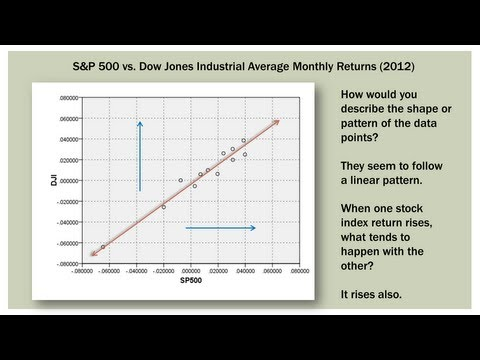

In [14]:
YouTubeVideo('xGbpuFNR1ME')

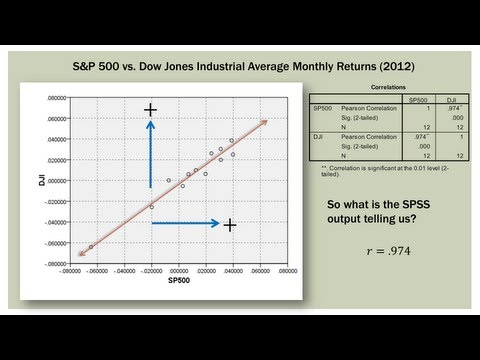

In [15]:
YouTubeVideo('4EXNedimDMs')

In [16]:
#Use Pandas to scrape stock info from the web
import pandas.io.data as pdweb
import datetime

C:\Users\JamesDillon\Anaconda3\lib\site-packages\pandas\io\data.py:35: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


In [17]:
#Many built in methods to get stock data off the web
#Let's check some Oil stocks
prices = pdweb.get_data_yahoo(['CVX','XOM','BP'],start=datetime.datetime(2010,1,1),
                              end=datetime.datetime(2013,1,1))['Adj Close']
prices.head()

,BP,CVX,XOM
Date,,,
2010-01-04,42.257896,61.192517,56.700952
2010-01-05,42.557951,61.625962,56.922342
2010-01-06,42.779422,61.633698,57.414323
2010-01-07,42.765133,61.401501,57.233934
2010-01-08,42.865151,61.509861,57.004337


In [18]:
#Get the volume of the trades
volume = pdweb.get_data_yahoo(['CVX','XOM','BP'],start=datetime.datetime(2010,1,1),
                             end=datetime.datetime(2013,1,1))['Volume']
volume.head()

,BP,CVX,XOM
Date,,,
2010-01-04,3956100.0,10173800.0,27809100.0
2010-01-05,4109600.0,10593700.0,30174700.0
2010-01-06,6227900.0,11014600.0,35044700.0
2010-01-07,4431300.0,9626900.0,27192100.0
2010-01-08,3786100.0,5624300.0,24891800.0


In [19]:
#What would be the daily returns on our stock??
rets = prices.pct_change()

In [20]:
#Correlation of the stocks
corr = rets.corr

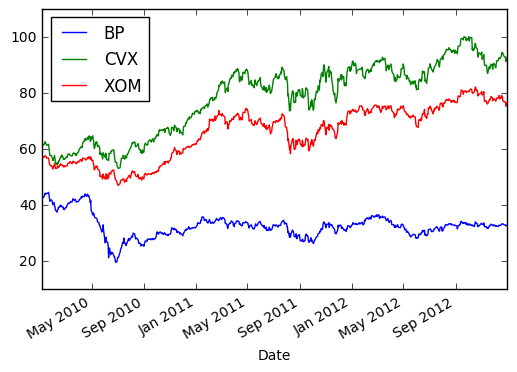

In [21]:
#Display the prices data via graph
%matplotlib inline
prices.plot()

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

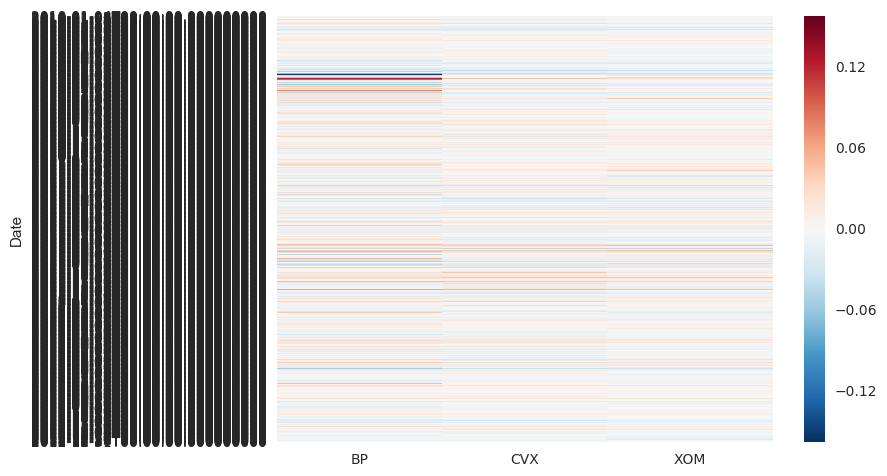

In [23]:
sns.heatmap(rets)

In [24]:
ser1 = Series(['w','w','w','x','y','z','w','x','y','x','a'])
ser1

0     w
1     w
2     w
3     x
4     y
5     z
6     w
7     x
8     y
9     x
10    a
dtype: object

In [25]:
ser1.unique()

array(['w', 'x', 'y', 'z', 'a'], dtype=object)

In [26]:
ser1.value_counts()

w    4
x    3
y    2
z    1
a    1
dtype: int64

# Missing Data[23]

In [27]:
#Dealing with missing data
data = Series(['1','2',np.nan,'four'])

In [28]:
data

0       1
1       2
2     NaN
3    four
dtype: object

In [29]:
data.isnull()

0    False
1    False
2     True
3    False
dtype: bool

In [30]:
#Remove all null values
data.dropna()

0       1
1       2
3    four
dtype: object

In [31]:
dframe = DataFrame([[1,2,3],[np.nan,5,6],[7,np.nan,9],[np.nan,np.nan,np.nan]])
dframe

,0,1,2
0,1.0,2.0,3.0
1,NaN,5.0,6.0
2,7.0,NaN,9.0
3,NaN,NaN,NaN


In [32]:
#In Pandas, with no additional arguments, dropna will remove ANY row with any nan value
clean_dframe = dframe.dropna()
clean_dframe

,0,1,2
0,1.0,2.0,3.0


In [33]:
#We can specify to only drop rows completely missing all data with how argument
dframe.dropna(how='all')

,0,1,2
0,1.0,2.0,3.0
1,NaN,5.0,6.0
2,7.0,NaN,9.0


In [34]:
#Specify by columns [aka axis 1]
dframe.dropna(axis=1)

""
0
1
2
3


In [35]:
#Specify by rows [aka axis 0]
dframe.dropna(axis=0)

,0,1,2
0,1.0,2.0,3.0


In [36]:
#We can also set a threshold for dropna level
npn = np.nan
dframe2 = DataFrame([[1,2,3,npn],[2,npn,5,6],[npn,7,npn,9],[1,npn,npn,npn]])
dframe2

,0,1,2,3
0,1.0,2.0,3.0,NaN
1,2.0,NaN,5.0,6.0
2,NaN,7.0,NaN,9.0
3,1.0,NaN,NaN,NaN


In [37]:
#Threshold specifies per row, the minimum amount of data points there must be
#otherwise the row gets dropped
dframe2.dropna(thresh=2)

,0,1,2,3
0,1.0,2.0,3.0,NaN
1,2.0,NaN,5.0,6.0
2,NaN,7.0,NaN,9.0


In [38]:
dframe2.dropna(thresh=3)

,0,1,2,3
0,1.0,2.0,3.0,NaN
1,2.0,NaN,5.0,6.0


In [39]:
#Fill nan values with a specified replacement
dframe2.fillna(1)

,0,1,2,3
0,1.0,2.0,3.0,1.0
1,2.0,1.0,5.0,6.0
2,1.0,7.0,1.0,9.0
3,1.0,1.0,1.0,1.0


In [40]:
dframe2

,0,1,2,3
0,1.0,2.0,3.0,NaN
1,2.0,NaN,5.0,6.0
2,NaN,7.0,NaN,9.0
3,1.0,NaN,NaN,NaN


In [41]:
#To get more detailed, we can target specific columns with fill data for 
#that column only.  We can do this by passing a dictionary.
dframe2.fillna({0:0,1:1,2:2,3:3})

,0,1,2,3
0,1.0,2.0,3.0,3.0
1,2.0,1.0,5.0,6.0
2,0.0,7.0,2.0,9.0
3,1.0,1.0,2.0,3.0


In [42]:
#How to modify the existing object? Use inplace argument to make it permanent.
dframe2.fillna(0, inplace=True)
dframe2

,0,1,2,3
0,1.0,2.0,3.0,0.0
1,2.0,0.0,5.0,6.0
2,0.0,7.0,0.0,9.0
3,1.0,0.0,0.0,0.0


# Index Hierarchy[24]

In [43]:
from numpy.random import randn

In [44]:
#Create a Series with multiple index levels
#Assigns index values sequentially
ser = Series(randn(6),index=[[1,1,1,2,2,2],['a','b','c','a','b','c']])
ser

1  a   -1.590891
   b    1.090453
   c   -0.318403
2  a    0.689047
   b   -0.178025
   c    0.043593
dtype: float64

In [45]:
#Check index levels
ser.index

MultiIndex(levels=[[1, 2], ['a', 'b', 'c']],
           labels=[[0, 0, 0, 1, 1, 1], [0, 1, 2, 0, 1, 2]])

In [46]:
#Check subsets
ser[1]

a   -1.590891
b    1.090453
c   -0.318403
dtype: float64

In [47]:
ser[2]

a    0.689047
b   -0.178025
c    0.043593
dtype: float64

In [48]:
#Check everything in outer index, then everything associated with a in lower index
ser[:,'a']

1   -1.590891
2    0.689047
dtype: float64

In [49]:
#The unstack method allows us to take a multi-level index Series and turn into a DataFrame
dframe = ser.unstack()
dframe

,a,b,c
1,-1.590891,1.090453,-0.318403
2,0.689047,-0.178025,0.043593


In [50]:
#DataFrame with multiple index levels
dframe2 = DataFrame(np.arange(16).reshape(4,4),index=[['a','a','b','b'],
                                                     [1,2,1,2]],
                   columns=[['NY','NY','LA','SF'],['cold','hot','hot','cold']])
dframe2

NY      LA   SF
    cold hot hot cold
a 1    0   1   2    3
  2    4   5   6    7
b 1    8   9  10   11
  2   12  13  14   15

In [51]:
dframe2.ix['a',1]

NY  cold    0
    hot     1
LA  hot     2
SF  cold    3
Name: (a, 1), dtype: int32

In [52]:
dframe2.index.names = ['INDEX_1','INDEX_2']
dframe2.columns.names = ['Cities','Temp']
dframe2

Cities            NY      LA   SF
Temp            cold hot hot cold
INDEX_1 INDEX_2                  
a       1          0   1   2    3
        2          4   5   6    7
b       1          8   9  10   11
        2         12  13  14   15

In [53]:
#Interchange the level orders, outside vs. inside (swap level method)
dframe2.swaplevel('Cities','Temp',axis=1)


Temp            cold hot     cold
Cities            NY  NY  LA   SF
INDEX_1 INDEX_2                  
a       1          0   1   2    3
        2          4   5   6    7
b       1          8   9  10   11
        2         12  13  14   15

In [54]:
#Pass a sub level of the index to sort
dframe2.sortlevel(1)

Cities            NY      LA   SF
Temp            cold hot hot cold
INDEX_1 INDEX_2                  
a       1          0   1   2    3
b       1          8   9  10   11
a       2          4   5   6    7
b       2         12  13  14   15

In [55]:
#Perform operations on levels, summarize indices based on columns
dframe2.sum(level='Temp',axis=1)

Temp             cold  hot
INDEX_1 INDEX_2           
a       1           3    3
        2          11   11
b       1          19   19
        2          27   27